In [6]:
import numpy as np

In [7]:
import pandas as pd

In [8]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [10]:
df = pd.read_csv('laptops_10.csv')
df.head()

,Company,Product,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Cpu_Company,Memory_Amount,Memory_Type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,Intel,128,SSD
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34,898.94,Intel,128,FlashStorage
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86,575.00,Intel,256,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83,2537.45,Intel,512,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,Intel,256,SSD


### Задание 1 
(на распределение вещественных -> измеряемых признаков, для них лучше всего подходит гистограмма). Гистограмма показывает распределение признака (а не его количетсвенное выражение). Количественное выражение признака показывает стобликовая диаграмма

#### 1.1 Изучите распределение количества памяти (Memory_Amount) с помощью matplotlib
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

In [11]:
df['Memory_Amount'].value_counts().sort_values() # перед построением графика лучше помсмотреть количество ноубуков в изучаемом признаке

240       1
8         1
508       1
180       5
16       10
2048     16
64       17
32       45
500     132
512     140
128     177
1024    250
256     508
Name: Memory_Amount, dtype: int64

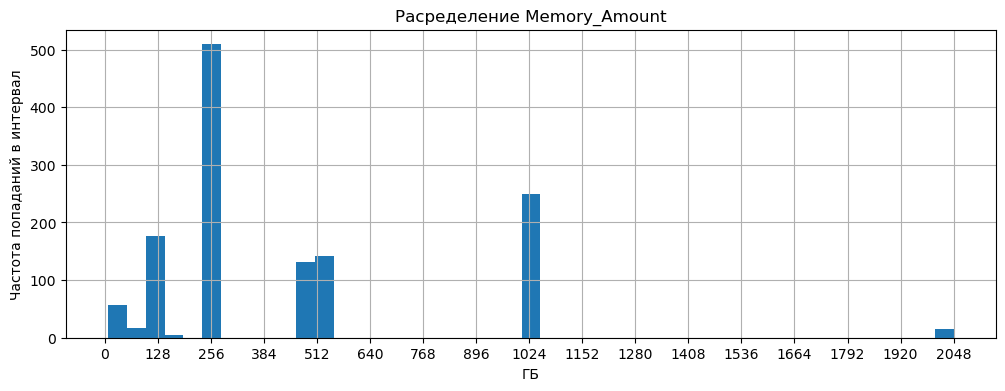

In [12]:
plt.figure(figsize=(12,4))

plt.hist(df['Memory_Amount'],  bins=45)  # ширина бина (binwidth) для распределения лучше всего использовать гистограмму (по умолчанию =10)

plt.title('Расределение Memory_Amount')
plt.xlabel('ГБ')
plt.ylabel('Частота попаданий в интервал') 
plt.xticks(range(0, 2050, 128))   # градация тиков по оси х (мин, макс, шаг) макс и мин берем больше чтоб вошло
plt.grid();    # лучше ставить ; чтобы в ответе не было лишнего текста grid() - добавляет сетку

#### Вывод:
- наибольшее количество ноубтуков (508 шт) с объемом памяти 250 ГБ,
- на втором месте с объемом памяти 1024 ГБ (250 шт), 
- на третьем месте ноутбуки с объемом памяти 128 ГБ и 500 ГБ

#### 1.2 Изучите распределение стоимости ноутбуков (Price_euros) с помощью matplotlib

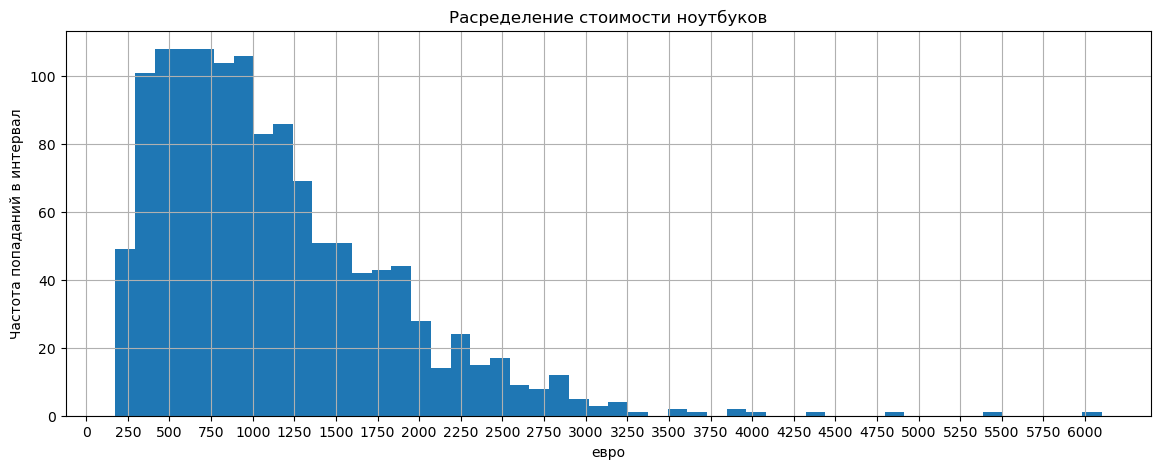

In [13]:
plt.figure(figsize=(14,5))

plt.hist(df['Price_euros'],  bins=50)  

plt.title('Расределение стоимости ноутбуков')
plt.xlabel('евро')
plt.ylabel('Частота попаданий в интервал') 
plt.xticks(range(0, 6100, 250))   
plt.grid();

### Вывод:
Стоимость ноубуков сосредоточена в диапазоне от 250 - 1000 евро. Далее с ростом цены идет постепенное снижение количества ноутбуков

### 1.3 Изучите распределение веса ноутбуков (Weight) с помощью matplotlib

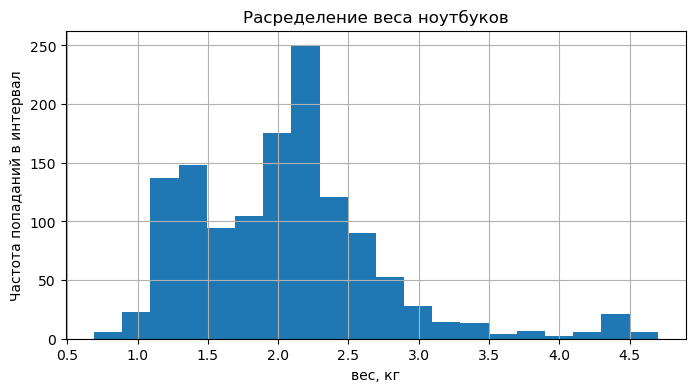

In [14]:
plt.figure(figsize=(8 ,4))

plt.hist(df['Weight'], bins=20)

plt.title('Расределение веса ноутбуков')
plt.xlabel('вес, кг')
plt.ylabel('Частота попаданий в интервал') 
plt.grid(); 

#### Вывод:
- вес ноутбуков в основном составляет 2,2 кг, вторая по объему группа ноутбуков с весом 1,1 - 2 кг. Количество ноутубуков с весом более 2,5 незначительно.

### Задание 2
на распределение категориальных признаков (качественных) лучше всего с помощью столбчатой диаграммы

#### 2.1 Изучите распределение типов носителя (Memory_Type)
- Постройте график
- Сделайте выводы

In [17]:
# готовим данные для графика индексов получилось не много (4) поэтому можно строить и пирожок
data_01 = df['Memory_Type'].value_counts()
data_01

SSD             641
HDD             576
FlashStorage     74
Hybrid           12
Name: Memory_Type, dtype: int64

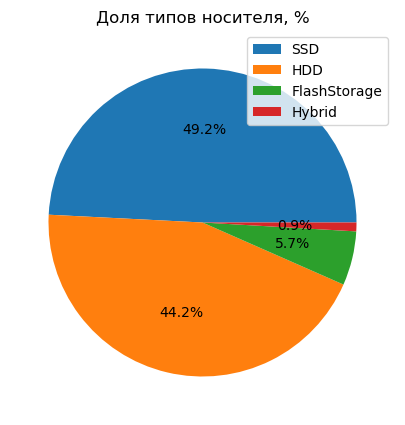

In [18]:
# строим пирожок, но данные нужно представить в виде %%
plt.figure(figsize=(6,5))

plt.title('Доля типов носителя, %')  
plt.pie(data_01, autopct='%1.1f%%')       # '%.1f%%' - это количество знаков после запятой
plt.legend(data_01.index); 

#### Вывод:
- Совокупность ноутбуков представлена в основном двумя видами носителей: SSD - 49,2% и HDD - 44,2%. Доля остальных незначительна

#### 2.2 Изучите распределение компаний производителей (Company)

In [19]:
data_02 = df['Company'].value_counts()
data_02

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

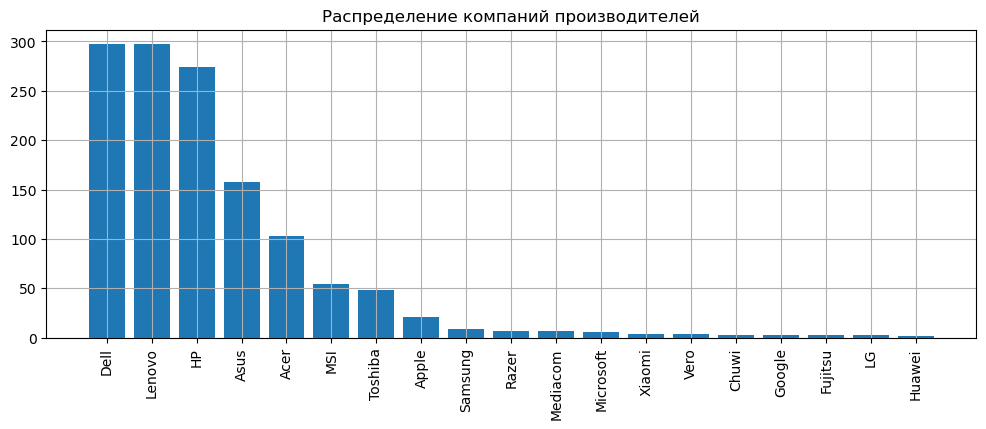

In [20]:
# построим столбики
plt.figure(figsize=(12, 4))

plt.title('Распределение компаний производителей')
plt.bar(data_02.index, data_02)
plt.xticks(rotation=90); 

plt.grid()

2 - вариант

In [25]:
data_02b = df['Company'].value_counts().reset_index() # с reset_index() удобнее, т.к. сразу вижу сколько групп
data_02b

,index,Company
0,Dell,297
1,Lenovo,297
2,HP,274
3,Asus,158
4,Acer,103
5,MSI,54
6,Toshiba,48
7,Apple,21
8,Samsung,9
9,Razer,7


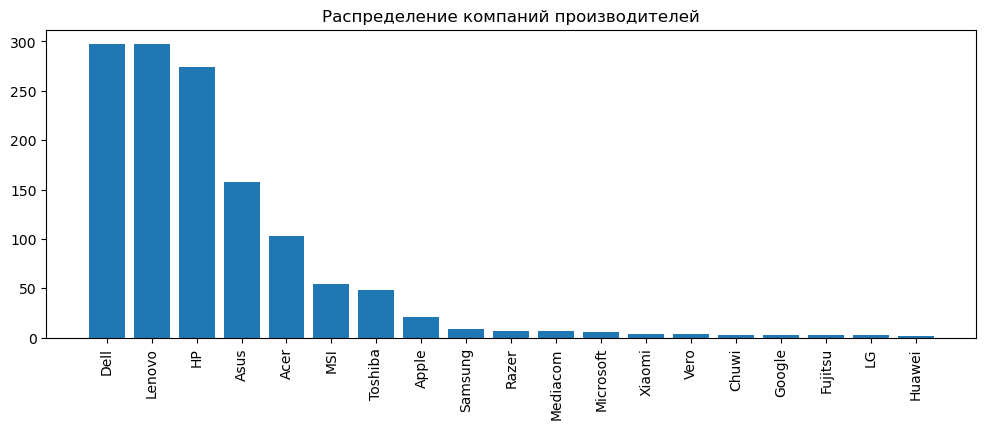

In [26]:
plt.figure(figsize=(12, 4))

plt.bar(data_02b['index'], data_02b['Company'])
plt.title('Распределение компаний производителей')
plt.xticks(rotation=90); 

#### Вывод:
- среди компаний производителей лидирую Dell, Lenovo, HP. Далее в половину меньше Asus и Acer. Количество ноутбуков других производителей незначительно.

#### 2.3 Изучите распределение операционной системы (OpSys)

In [27]:
data_03 = df['OpSys'].value_counts().reset_index() 
data_03

,index,OpSys
0,Windows 10,1072
1,No OS,66
2,Linux,62
3,Windows 7,45
4,Chrome OS,27
5,macOS,13
6,Mac OS X,8
7,Windows 10 S,8
8,Android,2


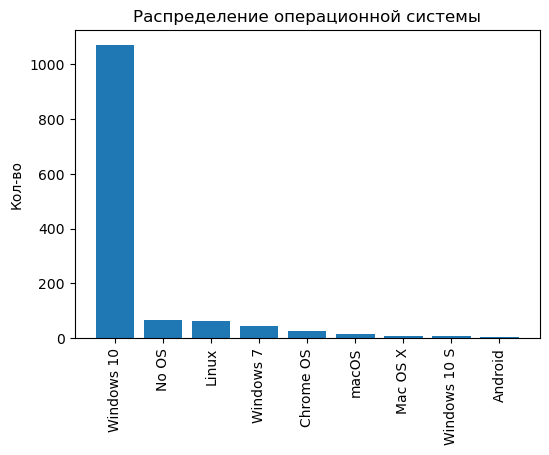

In [29]:
plt.figure(figsize=(6, 4))

plt.bar(data_03['index'], data_03['OpSys'])

plt.title('Распределение операционной системы')
plt.ylabel('Кол-во')
plt.xticks(rotation=90); 

#### Вывод:
- практически на всех ноутбуках стоит операционная система Windows 10

### 2.4 Изучите распределение компаний производителей CPU (Cpu_Company)

In [30]:
data_04 = df['Cpu_Company'].value_counts()
data_04

Intel      1240
AMD          62
Samsung       1
Name: Cpu_Company, dtype: int64

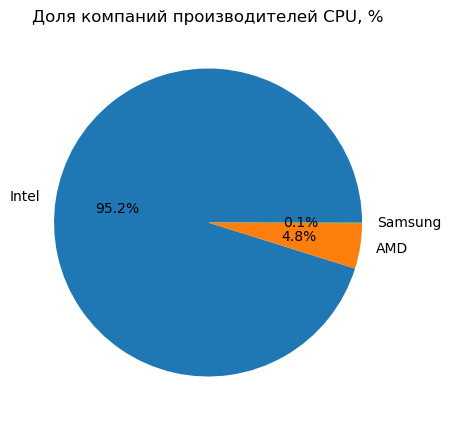

In [31]:
# строим пирожок, т.к. групп мало, но данные нужно представить в виде %%
plt.figure(figsize=(6, 5))

plt.title('Доля компаний производителей CPU, %')
plt.pie(data_04, labels=data_04.index, autopct='%.1f%%');  # легенду прописывать не стала, т.к. Samsung цвета не видно

#### Вывод: Среди производителей CPU лидирует Intel - 95,2%. Доля AMD и Samsung незначительна

### Задание 3

#### 3.1 Изучите взаимосвязь компаний производителей ноутбуков и компаний производителей процессоров, используя сложенную или многорядовую столбчатую диаграмму
- Процессоры от Samsung не изучайте

#### Постройте график в абсолютных величинах

In [32]:
# подготовим данные для анализа
data_05 = pd.crosstab(df['Company'], df['Cpu_Company'])
data_05

Cpu_Company,AMD,Intel,Samsung
Company,,,
Acer,10,93,0
Apple,0,21,0
Asus,11,147,0
Chuwi,0,3,0
Dell,0,297,0
Fujitsu,0,3,0
Google,0,3,0
HP,25,249,0
Huawei,0,2,0


In [33]:
# теперь нужно убрать графу Sumsung и сбросить индекс
# reset_index () используется для сброса индекса DataFrame и установливает список целых чисел от 0 до длины данных в качестве индекса.
# Метод reset_index () полезен, когда индекс необходимо рассматривать как столбец или когда индекс не имеет смысла и его необходимо 
# сбросить до значения по умолчанию перед другой операцией.

data_05 = data_05.reset_index().drop(columns=['Samsung'])
data_05

Cpu_Company,Company,AMD,Intel
0,Acer,10,93
1,Apple,0,21
2,Asus,11,147
3,Chuwi,0,3
4,Dell,0,297
5,Fujitsu,0,3
6,Google,0,3
7,HP,25,249
8,Huawei,0,2
9,LG,0,3


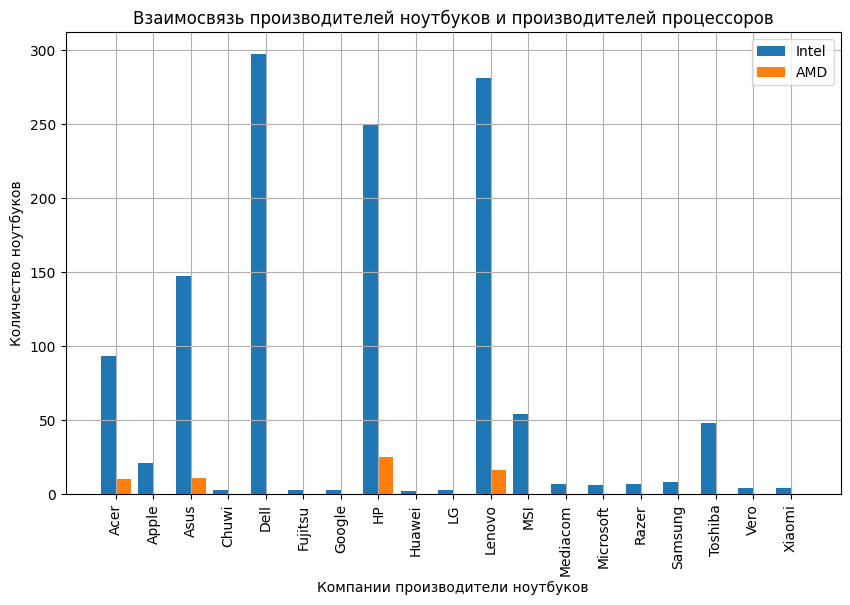

In [ ]:
plt.figure(figsize=(10, 6))

n_ticks = np.arange(len(data_05['AMD'])) # определяем кол-во делений по любому столбику
# n_ticks -> array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

# определяем сдвиг
offset = 0.2

# определяем ширину столбцов (0.2 + 0.2)
w = 0.4

# добавляем сдвиг к кол-ву делений
plt.bar(n_ticks - offset, data_05['Intel'], width=w)
plt.bar(n_ticks + offset, data_05['AMD'], width=w)

plt.title('Взаимосвязь производителей ноутбуков и производителей процессоров')
plt.xlabel('Компании производители ноутбуков')
plt.ylabel('Количество ноутбуков')
plt.legend(['Intel', 'AMD'])
plt.xticks(n_ticks, data_05['Company'], rotation = 90)  # добавляем метки делений (если 'Company' не поставим, то получм array)
plt.grid(); 

#### Вывод:
- только 4 компании производят процессоры AMD: Accer, Asus, Hp и Lenovo

#### 3.2 Постройте график в относительных величинах

In [34]:
# готовим данные для графика, добавляем атрибут normalize='index', чтобы представить данные в долях единицы
data_06 = pd.crosstab(df['Company'], df['Cpu_Company'], normalize='index').reset_index().drop(columns=['Samsung'])
data_06

Cpu_Company,Company,AMD,Intel
0,Acer,0.097087,0.902913
1,Apple,0.000000,1.000000
2,Asus,0.069620,0.930380
3,Chuwi,0.000000,1.000000
4,Dell,0.000000,1.000000
5,Fujitsu,0.000000,1.000000
6,Google,0.000000,1.000000
7,HP,0.091241,0.908759
8,Huawei,0.000000,1.000000
9,LG,0.000000,1.000000


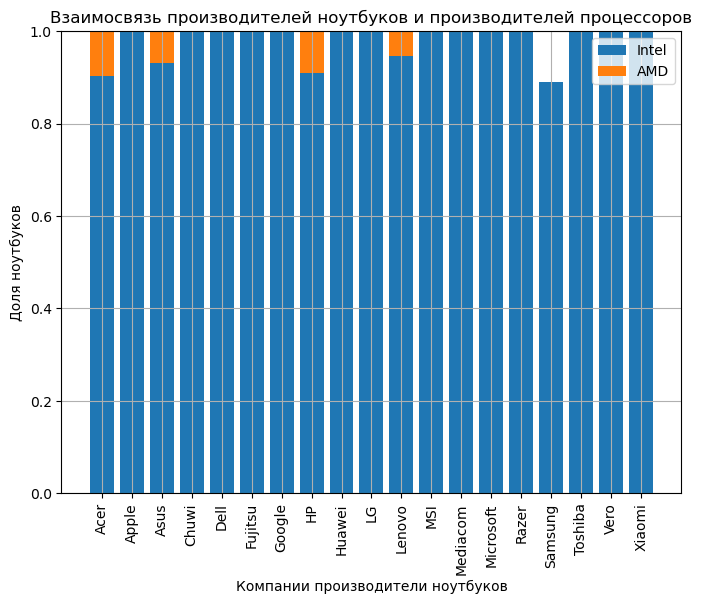

In [35]:
plt.figure(figsize=(8, 6))

plt.bar(data_06['Company'], data_06['Intel'])                             # рисуем первый график
plt.bar(data_06['Company'], data_06['AMD'], bottom=data_06['Intel'])      # рисуем второй график атрибут bottom=['Intel'] указывает, что поверх первого

plt.title('Взаимосвязь производителей ноутбуков и производителей процессоров')
plt.xlabel('Компании производители ноутбуков')
plt.ylabel('Доля ноутбуков')
plt.legend(['Intel', 'AMD'])
plt.xticks(rotation=90)
plt.grid(); 

### 4. Задание (заимосвязь вещественного признака и категориального)

#### 4.1 Изучите взаимосвязь стоимости ноутбука и компании производителя процессора
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

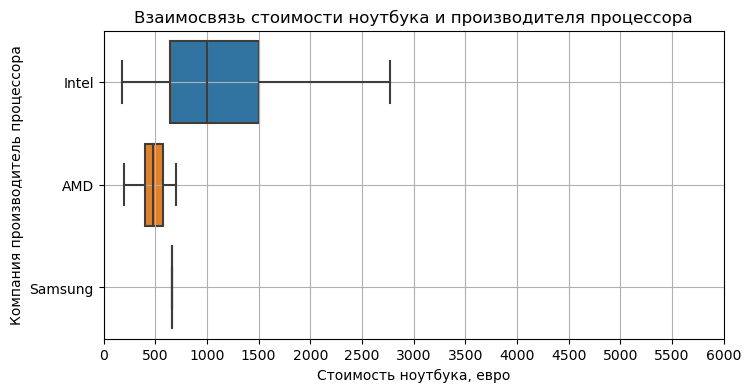

In [68]:
plt.figure(figsize=(8, 4))

sns.boxplot(x=df['Price_euros'], y=df['Cpu_Company'], showfliers=False)
plt.title('Взаимосвязь стоимости ноутбука и производителя процессора')
plt.xlabel('Стоимость ноутбука, евро')
plt.ylabel('Компания производитель процессора')
plt.xticks(range(0, 6001, 500))
plt.grid(); 

#### Вывод:
 Ноутбуки с процессором Intel самые дорогие.

#### 4.2 Изучите взаимосвязь стоимости ноутбука и типа носителя памяти

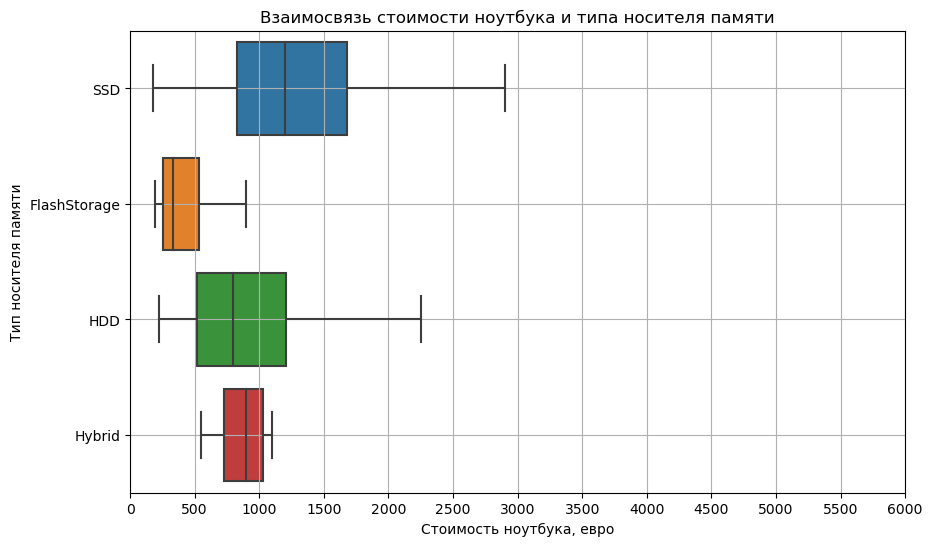

In [69]:
plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Price_euros'], y=df['Memory_Type'], showfliers=False)
plt.title('Взаимосвязь стоимости ноутбука и типа носителя памяти')
plt.xlabel('Стоимость ноутбука, евро')
plt.ylabel('Тип носителя памяти')
plt.xticks(range(0, 6001, 500))
plt.grid(); 

#### Вывод:
 Ноутбуки, укомплектованные SSD дороже. Ноутбуки у которые стоит FlashStorage самые дешевые

#### 4.3 Изучите взаимосвязь стоимости ноутбука и кол-ва оперативной памяти

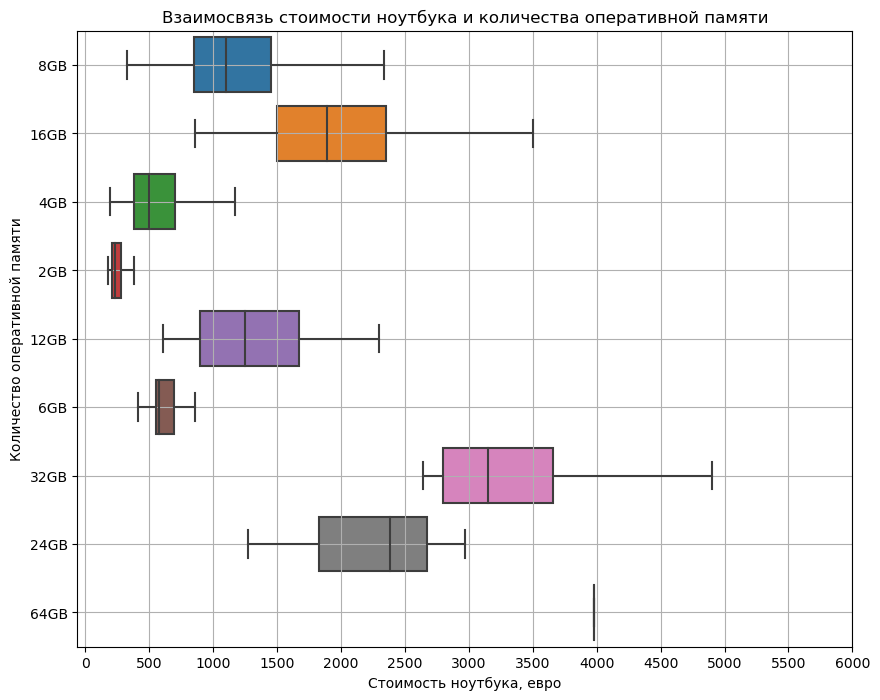

In [67]:
plt.figure(figsize=(10, 8))

sns.boxplot(x=df['Price_euros'], y=df['Ram'], showfliers=False) # атрибут showfliers=False удаляет выбросы
plt.title('Взаимосвязь стоимости ноутбука и количества оперативной памяти')
plt.xlabel('Стоимость ноутбука, евро')
plt.ylabel('Количество оперативной памяти')
plt.xticks(range(0, 6001, 500))
plt.grid(); 

#### Вывод: 
чем больше оперативной памяти, тем дороже ноутбук

### 4.4 Изучите взаимосвязь стоимости ноутбука и компании производителя

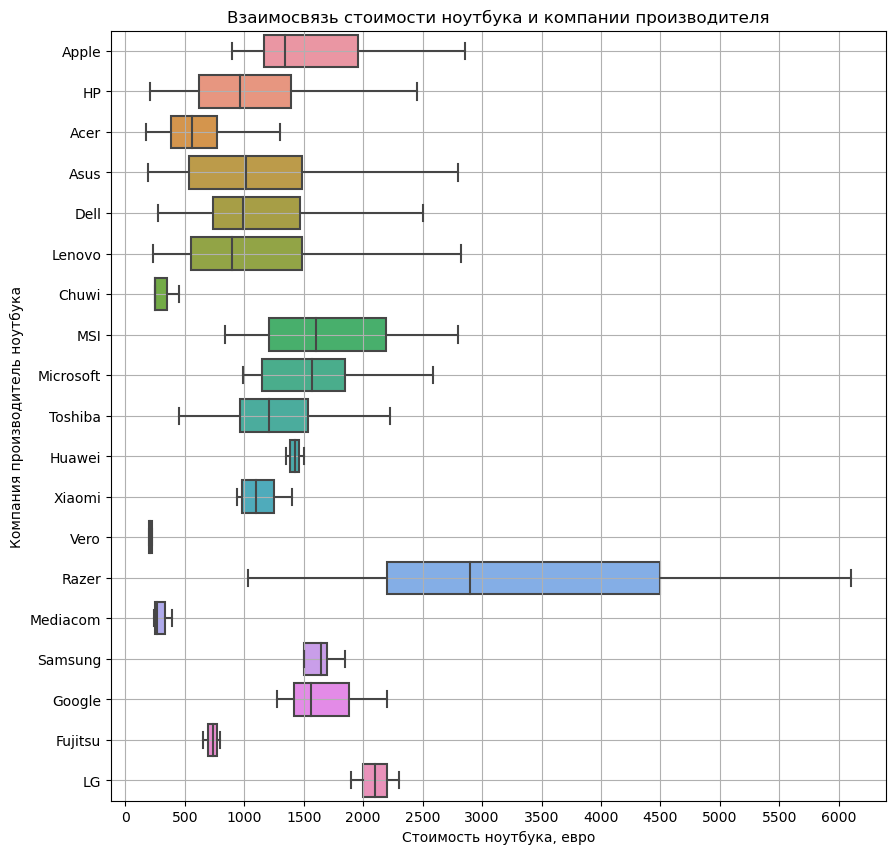

In [70]:
plt.figure(figsize=(10, 10))

sns.boxplot(x=df['Price_euros'], y=df['Company'], showfliers=False)
plt.title('Взаимосвязь стоимости ноутбука и компании производителя')
plt.xlabel('Стоимость ноутбука, евро')
plt.ylabel('Компания производитель ноутбука')
plt.xticks(range(0, 6001, 500))
plt.grid(); 

#### Вывод:
Ноутбуки фирмы Razer самые дорогие

### Задание 5

#### 5.1 Постройте матрицу корреляций для таблицы


Шкала Чеддока (для коэф. Пирсона):
0.1 - 0.3 - Слабая
0.3 - 0.5 - Умеренная
0.5 - 0.7 - Заметная
0.7 - 0.9 - Высокая
0.9 - 0.99 - Весьма высокая

In [88]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)     # округляю
corr_matrix[np.abs(corr_matrix) < 0.3] = 0 # булевая маска, коэфф. корреляции < 0,3 приравнивает 0, т.к. связи нет
corr_matrix

C:\Users\CND\AppData\Local\Temp\ipykernel_8676\1030668677.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,Inches,Weight,Price_euros,Memory_Amount
Inches,1.00,0.83,0.0,0.0
Weight,0.83,1.00,0.0,0.0
Price_euros,0.00,0.00,1.0,0.0
Memory_Amount,0.00,0.00,0.0,1.0


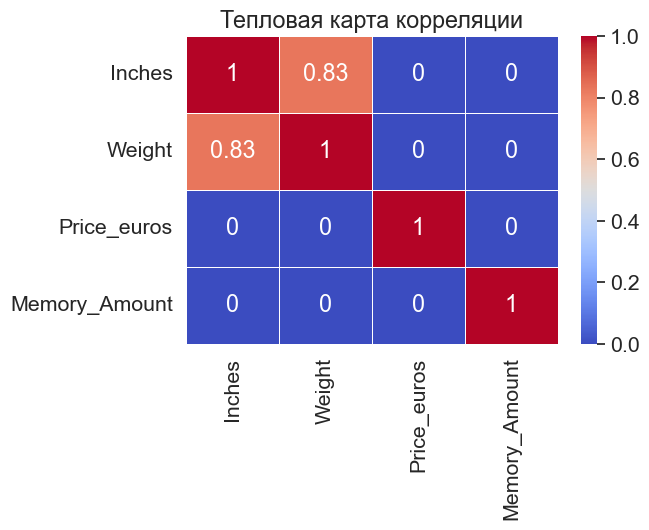

In [89]:
plt.figure(figsize=(6, 4))

sns.set(font_scale=1.4)

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm') # annot=True добавляет цифры в квадратики
# linewidths=.5 - атрибут добавляют разделительную белую линию между квадратами, cmap='coolwarm' - тепловая карта

plt.title('Тепловая карта корреляции');

#### Вывод:
Выявлена слабая связь между диагональю экрана и весом ноутбука